In [610]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [611]:
Operators = ["+", '-', '*', '/',"^", "sin" , "cos"]
Values = [0 , 1, 2, 3, 4, 5, 6, 7, 8, 9]
variable = ['x']
First_population = 40
Best_choise_num = 5
Other_choise_num = 2
Iteration = 50
Mutation_rate = 0 #From 100%
Mutation_count = 0 #Per gen
Max_tree_depth = 4
copy_Mutation_rate = 10
copy_Mutation_count = 2
max_node = 2 ** Max_tree_depth

In [612]:
def function(x):
    # return 2 * (x**2) + 3 * x + 1
    return 3*(x/2)

In [613]:
X_train = np.random.randint(1, 200, size=(100, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train


array([ 43.5, 261. , 171. ,  82.5, 256.5, 130.5, 258. , 180. ,  25.5,
       177. ,   4.5,  54. ,  63. , 286.5, 232.5,  61.5, 258. , 148.5,
       198. ,  87. , 231. ,  94.5, 253.5, 276. ,  70.5, 244.5, 126. ,
        42. ,  81. , 234. , 154.5, 181.5, 102. , 246. , 165. , 292.5,
        52.5,  27. ,  69. , 219. ,   6. , 247.5,  40.5, 216. ,   4.5,
        69. , 157.5, 196.5, 250.5, 157.5, 216. ,   6. ,  61.5, 120. ,
       184.5, 163.5, 114. , 262.5, 133.5, 105. ,  37.5, 105. , 132. ,
       186. ,  12. , 283.5, 106.5, 201. ,  67.5,  45. , 267. , 273. ,
       279. ,  22.5, 187.5,  10.5, 135. , 201. , 205.5, 256.5,  33. ,
        21. , 276. ,  69. , 102. ,  97.5,  73.5,  52.5, 252. , 120. ,
        90. , 279. , 237. , 247.5,  90. ,  85.5, 211.5, 211.5,  91.5,
        58.5])

In [614]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [615]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()
    
    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))
        

    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child = random.choice(Values)
                else:
                    child = "x"
                temp_node = Node (operator=temp_op, children=[child])
                temp_node.isLeaf = True
                return temp_node
            else :
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child1 = random.choice(Values)
                else:
                    child1 = "x"
                
                randomOp = random.randint(0,10)
                if (randomOp >= 5):
                    child2 = random.choice(Values)
                else:
                    child2 = "x"
                temp_node = Node (operator= temp_op , children=[child1,child2])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    if (node.children[0] == "x"):
                        node.value = self.SinCosOp (node , val)

                    else :
                        node.value = self.SinCosOp (node , node.children[0])
                    # return node.value
                else :
                    if (node.children[0] == "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , val , val)
                    elif (node.children[0] == "x" and node.children[1] != "x"):
                        node.value = self.OtherOp (node , val , node.children[1])
                    elif (node.children[0] != "x" and node.children[1] == "x"):
                        node.value = self.OtherOp (node , node.children[0], val)
                    else:
                        node.value = self.OtherOp (node , node.children[0] , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp(self, node, val1, val2, flag=False):
        if flag:
            return

        if node.operator == "+":
            result = val1 + val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "-":
            result = val1 - val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "*":
            result = val1 * val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "/":
            if val2 == 0:
                flag = True
                return 1
            # Convert val1 and val2 to float to avoid overflow errors
            result = float(val1) / float(val2)
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "^":
            if val1 == 0 and val2 < 0:
                return 1
            else:
                if val2 == 0:
                    return 1
                x = 1
                i = 1
                while not flag and i <= val2:
                    x = x * val1
                    i += 1
                    if x > 10000 or x < -10000:
                        flag = True
                        return 10000
                return x



    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node


In [616]:
def Create_tree ():
    my_tree = Tree(random.randint(1 , Max_tree_depth))
    my_tree.create()
    return my_tree


In [617]:
treeList = []
for i in range (First_population):
    treeList.append(Create_tree())
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

(x - x)
(sin(x) ^ (9 - 6))
(sin(9) - (x ^ 0))
(4 * x)
cos((7 + x))
sin((cos(x) + cos(((8 * 0) + (x / x)))))
((x + 5) - (x * x))
(sin(9) * (cos(sin(x)) ^ (((x * x) / (x ^ 0)) + ((1 - x) - cos(0)))))
sin(4)
(cos(x) + cos(x))
cos(x)
((x * x) / (7 * 4))
cos(x)
(((0 / 2) ^ (0 - 2)) - (cos(x) / cos(8)))
(((x ^ 2) / cos(x)) - ((x ^ x) ^ (7 ^ 2)))
sin(((((9 + x) / (x / 7)) * ((3 + 9) ^ sin(x))) - ((5 * x) + (cos(x) + (4 ^ x)))))
(7 * x)
((((6 ^ x) * (x + 1)) / (cos(x) / (4 - 5))) - (sin(6) / ((4 ^ x) + (1 * 0))))
sin((x / x))
(((x - 1) * (x / x)) - (cos(0) ^ (x - 7)))
(x - 4)
(sin(x) ^ (4 ^ 1))
((6 / 7) + (x + x))
((x / 5) ^ cos((x + x)))
(5 ^ x)
((4 + 1) ^ (x * 1))
(1 ^ 2)
cos(((x ^ x) ^ ((cos(9) + cos(9)) + ((4 ^ 0) * (2 / x)))))
(sin(((2 / 8) ^ (8 * 0))) + ((cos(3) ^ (5 / x)) ^ (cos(0) * (9 - 2))))
sin(cos(cos(((x / 3) / (7 / 0)))))
(((3 + x) - (4 * 9)) - (sin(x) * cos(1)))
(cos((6 * 1)) / sin(x))
(cos(3) - ((x / x) * (x * x)))
((x / x) + sin(x))
(((((3 - 0) * (x / x)) ^ ((x / x) - (4 - x))

In [618]:
avg = []
n = 0
for i in range (Iteration):

    bestTrees = []
    otherTrees = []

    #Find the best MSEs
    bestTreesIndex = mseTree.argsort()[:Best_choise_num]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]
    
    #Create new gen from best trees and others
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])
    # for j in range (len(other_idx)):
    #     otherTrees.append(treeList[other_idx[j]])
    # random_elements = random.sample(otherTrees, Other_choise_num)
    # for element in random_elements :
    #      bestTrees.append(element)

    # Mutation
    # if (len(avg) > 10):
    #     if (all(avg[-5] == item for item in avg[-4:]) and avg[-1] > 10):
    #         Mutation_rate *= 2
    #         Mutation_count *=2
    #     elif (all(avg[-10] == item for item in avg[-9:] ) and avg[-1] > 10) :
    #         Mutation_rate *= 5
    #         Mutation_count *= 5
    #     else :
    #         Mutation_rate = copy_Mutation_rate
    #         Mutation_count = copy_Mutation_count

    if (len(avg) > 2):
        if avg[-1] == 0 :
            break
        tempDiff = abs(avg[-2] - avg[-1])
        if (tempDiff == 0):
            tempScale = 200
        else:
            tempScale = avg[-1] / tempDiff
        if ( avg[-1]<1):
            n=0
            Mutation_rate = 0
            Mutation_count = 0
        elif (tempScale > 100 and avg[-1]>10):
            # print (avg[-1])
            # print ("&&&&&&&")
            n +=1
            Mutation_rate = copy_Mutation_rate * n
            Mutation_count = copy_Mutation_count * n
        else :
            n=0
            Mutation_rate = copy_Mutation_rate
            Mutation_count = copy_Mutation_count


    tempRate = random.randint(1,100)
    if (tempRate <= Mutation_rate):
        for j in range (Mutation_count):
            tempTree = Create_tree()
            bestTrees.append(tempTree)
            print ("!!!!!!!!")
            print (i)
            tempTree.printTree()



    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):
            flag = True
            
            for i in range (10):
                temp1 = copy.deepcopy(bestTrees[j])
                temp2 = copy.deepcopy(bestTrees[k])

                nodes1= temp1.TreeToList()
                nodes2 = temp2.TreeToList()

                # print (str(len(nodes1)) + " || " + str(len(nodes2)))

                select1 = random.choice (nodes1)
                select2 = random.choice (nodes2)

                # print ("Before change")
                # temp1.printTree()
                # temp2.printTree()

                # print ("Selected Nodes:")
                # temp1.printTree(select1)
                # temp2.printTree(select2)

                temp1.ReplaceNode (select1 , select2)
                temp2.ReplaceNode (select2 , select1)

                list1= temp1.TreeToList()
                list2= temp2.TreeToList()

                if (len(list1) <= max_node and len(list2) <= max_node):
                    break
                # print ("After change")
                # temp1.printTree()
                # temp2.printTree()
                # print (str(len(list1)) + " || " + str(len(list2)))

            # print ("---------------------")


            treeList.append(temp1)
            treeList.append(temp2)
                
                # print ("Child created!")
                # print ("-----------------------------------------------------------")


    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:Best_choise_num]
    # avg.append(mean (lowest_five))
    avg.append(round((sum(lowest_five) / len(lowest_five)) , 2))
    mseTree = np.array(mseTree)
    # print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:Best_choise_num]
bestTreesIndex = mseTree.argsort()[:Best_choise_num]
print ("------------------------------------------")
for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

# print ("------------------------------------------")
# print (mseTree)

# np.array(avg)
avg


!!!!!!!!
12
((6 + 2) * sin(8))
!!!!!!!!
12
(x + x)
!!!!!!!!
12
((x ^ 0) - (((x - 9) + (1 / 0)) - (cos(8) * (2 ^ x))))
!!!!!!!!
12
(cos((x / 1)) / ((((0 * 5) * cos(0)) - (4 + 4)) ^ cos(1)))
!!!!!!!!
17
(((6 ^ 6) - (9 / 5)) * cos(0))
!!!!!!!!
17
(cos(x) ^ (((2 / 6) / (sin(x) + (7 + 5))) * (1 / x)))
!!!!!!!!
28
((sin(x) / (x - 4)) - (sin(9) ^ (4 + x)))
!!!!!!!!
28
((sin((9 + 0)) + cos((x ^ x))) + (x / x))
!!!!!!!!
28
sin(7)
!!!!!!!!
28
(4 - 9)
!!!!!!!!
28
cos(sin(x))
!!!!!!!!
28
((x / x) * sin(x))
!!!!!!!!
28
sin(((9 ^ x) * cos(x)))
!!!!!!!!
28
(sin(x) ^ (x + 4))
!!!!!!!!
31
((x ^ x) ^ (x * x))
!!!!!!!!
31
(((x / x) * (8 + 3)) - (cos((x ^ x)) + (sin(0) ^ (sin(x) - (0 ^ 3)))))
!!!!!!!!
31
(cos(((3 ^ x) / (3 + 9))) ^ sin(((8 ^ 1) - sin(0))))
!!!!!!!!
31
sin((((x ^ 4) + (0 * x)) ^ sin(sin(6))))
!!!!!!!!
31
(((x + x) + ((7 - x) ^ (6 / x))) + (cos((4 ^ x)) ^ sin((2 - 8))))
!!!!!!!!
31
(cos((x + x)) - (sin(x) + (x / x)))
!!!!!!!!
31
sin(6)
!!!!!!!!
31
((4 - 3) / sin(((0 + x) ^ (x * x))))
!!!!!!

[3278.6,
 3199.78,
 3155.86,
 3063.44,
 3009.81,
 2986.08,
 2923.03,
 2882.08,
 2818.38,
 2754.79,
 2744.82,
 2744.82,
 2707.91,
 2651.3,
 2610.43,
 2555.33,
 2534.22,
 2271.01,
 1854.25,
 1740.02,
 1592.66,
 1476.93,
 1366.99,
 1148.11,
 1146.09,
 1146.09,
 1146.09,
 1144.97,
 1142.42,
 1140.54,
 1140.1,
 1116.31,
 1060.48,
 962.66,
 865.96,
 865.96,
 865.47,
 865.23,
 864.75,
 864.75,
 863.03,
 859.79,
 774.33,
 491.44,
 344.38,
 121.82,
 121.13,
 120.03,
 119.9,
 119.9]

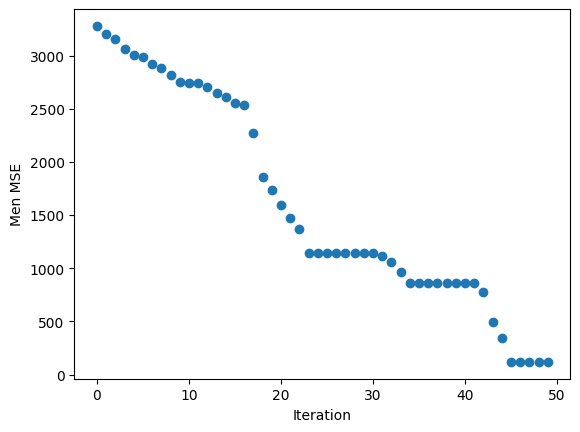

In [619]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()